In [4]:
# Import necessary Libraries
import random
import string
import csv
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
# Absolute path of folder where the csv file is located
# Which contains all the necessary information
csv_file_path = "/Users/baijayantabhattacharyya/Downloads/ETSC_Proj/" 

# Name of the csv file
csv_file_name = "ETSC_Term_Project.csv"

In [6]:
# Combine folder path and file name safely into one valid file path.
csv_file = os.path.join(csv_file_path, csv_file_name) 

# Open the CSV file for reading
# The 'with' statement ensures the file closes automatically when done
with open(csv_file, newline='') as f:
    
    
    # Skip the first two lines before DictReader starts reading
    # It contains info about the faculty and the course details 
    
    # read the first line and store it in a string 
    # It contains information about the course name 
    first_line = ''.join([next(f)]) 
    
    
    # read the second line and store it in a string 
    # It contains information about the faculty name 
    second_line = ''.join([next(f)])

    
    reader = csv.DictReader(f)

    # Save the headers (field names)
    headers = reader.fieldnames 

    # Print the headers
    print("Column headers:", headers,"\n")
    
    # This line reads the entire file into memory
    data = [row for row in reader]  # list of dictionaries

print(f"Done reading the {csv_file} file.\n")

Column headers: ['Serial No', 'Roll No', 'Name', 'Type', 'TA', 'MI', 'EN', 'TM', 'Grade', 'Remarks', 'Email', 'Institute Email', 'Mobile'] 

Done reading the /Users/baijayantabhattacharyya/Downloads/ETSC_Proj/ETSC_Term_Project.csv file.



In [7]:
# Extract the Course details that are on first line
# first line is '"ROLL LIST OF  ETSC TERM PROJECT (CD61203, LTP : 3-0-0, CRD : 3)",1,,,,,,,,,,,\r\n'

# Find starting and ending indices
start = first_line.find('ROLL LIST OF') + len('ROLL LIST OF')
end = first_line.find(')')

# Extract and clean
course_name = first_line[start:end+1].strip()

print(f"Course Name: {course_name}\n") # prints name of the course

Course Name: ETSC TERM PROJECT (CD61203, LTP : 3-0-0, CRD : 3)



In [8]:
# store more details in strings
# Split at '('
title, details = course_name.split('(')
title = title.strip()
details = details.strip(')')  # remove closing parenthesis

# Split details by comma
details_list = [d.strip() for d in details.split(',')]
course_code = details_list[0]
other_details = ', '.join(details_list[1:])

print(f"Course Name:  {title}\n")
print(f"Course Code:  {course_code}\n")
print(f"Details:  {other_details}\n")


Course Name:  ETSC TERM PROJECT

Course Code:  CD61203

Details:  LTP : 3-0-0, CRD : 3



In [9]:
# Extract the Faculty details that are on second line
# second line is 'FACULTY NAME :  Baijayanta Bhattacharyya,,,,,,,,,,,,\r\n'

# Find starting and ending indices
start = second_line.find('FACULTY NAME : ') + len('FACULTY NAME :')
end = second_line.find(',')

# Extract and clean
faculty_name = second_line[start:end].strip()

print(f"Faculty Name: {faculty_name}\n") # prints name of the faculty

Faculty Name: Baijayanta Bhattacharyya



In [10]:
# header keys 
# ['Serial No', 'Roll No', 'Name', 'Type', 'TA', 'MI', 'EN', 'TM', 'Grade', 'Remarks', 'Email', 'Institute Email', 'Mobile']

In [11]:
# print the number of students and course,faculty details
print(f"In this course named {course_name},\n\nTaught by {faculty_name},\n\nConsists a total of {len(data)} number of students.\n")

In this course named ETSC TERM PROJECT (CD61203, LTP : 3-0-0, CRD : 3),

Taught by Baijayanta Bhattacharyya,

Consists a total of 7 number of students.



In [12]:
# Find the Average marks
print(f"The average marks is : {np.average([ float(row['TM']) for row in data]):.2f} out of 100.\n")

The average marks is : 76.86 out of 100.



In [15]:
# Extract 'Grades' column values 
grades = [row['Grade'] for row in data if row['Grade']]

# Count occurrences of each grade
# Also sort grades by desired grade order

order = ['EX', 'A', 'B', 'C', 'D','F']   

grade_counts = {g: grades.count(g) for g in order if grades.count(g) != 0}

print(f"The grade count is : {grade_counts}\n")

# Alternative way to do the same
# from collections import Counter

# grade_counts = Counter(grades)
# grade_counts = {g: grade_counts_all[g] for g in order if grade_counts_all[g] != 0}

# print(grade_counts)

The grade count is : {'EX': 2, 'A': 3, 'B': 2}



Image will be saved at: /Users/baijayantabhattacharyya/Downloads/ETSC_Proj/outfigs 



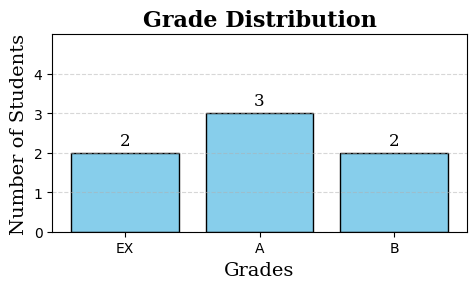

In [18]:
# Create a new figure window of specific size 
plt.figure(figsize=(5,3))

# Draw a bar chart
plt.bar(grade_counts.keys(), grade_counts.values(),color='skyblue', edgecolor='black')

# title of the plot
plt.title('Grade Distribution', fontsize=16, fontweight='bold', fontfamily='serif')

# Label the x-axis
plt.xlabel('Grades', fontsize=14, fontfamily='serif')

# Label the y-axis
plt.ylabel('Number of Students', fontsize=14, fontfamily='serif')

# Add grid lines on the y-axis for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show count labels on top of bars 
for i, (g, v) in enumerate(grade_counts.items()):
    plt.text(i, v + 0.2, str(v), ha='center',fontsize=12,fontfamily='serif')

# Adjust layout automatically so labels/titles fit neatly
plt.tight_layout()

ymax = max(grade_counts.values()) # max y value
# Force y-axis ticks to be integers
plt.yticks(np.arange(0,2+ymax))

# set the ylimit
plt.ylim(0,2+ymax)

# save the plot
# create a new directory named outfigs
# if not exists and create and save it there

# Create 'outfigs' directory inside csv_file_path
outfigs_dir = os.path.join(csv_file_path, "outfigs")
os.makedirs(outfigs_dir, exist_ok=True)  # Create if not exists

# Build the image filename
img_filename = course_name.replace(" ", "_") + "_grades."

# Full path to save the image
img_file = os.path.join(outfigs_dir, img_filename)

print(f"Image will be saved at: {outfigs_dir} \n")

# png file
plt.savefig(img_file+"png", dpi=500,bbox_inches='tight') 

# pdf file
plt.savefig(img_file+"pdf", dpi=500,bbox_inches='tight')

# display the chart
plt.show()

In [19]:
# Generate unique passcodes for students

# Parameters
num_students = len(data)        # total number of students 
passcode_length = 8             # number of characters per passcode

# Allowed characters: uppercase and lowercsae letters + digits + few special characters
# Choose any of the above char sets
chars = string.ascii_letters + string.digits + "@#$%&"

# Use a set to ensure all passcodes are unique
passcodes = set()

# Keep generating until we have one code per student
while len(passcodes) < num_students:
    code = ''.join(random.choices(chars, k=passcode_length))
    
    # set automatically removes duplicates
    passcodes.add(code)         

# Convert the set to a list 
passcodes = list(passcodes)

# summary
print(f"Generated {len(passcodes)} unique passcodes for {num_students} students.\n")


Generated 7 unique passcodes for 7 students.



In [20]:
# create a new csv file 
# same as old csv file adding just a column name Passcode

# Add new column with passcode
for ii,row in enumerate(data,start=0):
    row["passcode"] = passcodes[ii]

# Save updated data to CSV
# create a new directory named outcsv
# if not exists and create and save it there

# Create 'outcsv' directory inside csv_file_path
outcsv_dir = os.path.join(csv_file_path, "outcsv")
os.makedirs(outcsv_dir, exist_ok=True)  # Create if not exists

csv_name,csv_ext = os.path.splitext(csv_file_name)
updated_csv_filename = f"{csv_name}_passcode_updated{csv_ext}"
# Full path to save the csv file
updated_csv_file = os.path.join(outcsv_dir, updated_csv_filename)

print(f"Updated csv file name: {updated_csv_filename}\n")

print(f"Updated csv file will be saved at: {outcsv_dir} \n")


with open(updated_csv_file, "w", newline="") as f:
    # Write back first two lines
    f.write(first_line)
    f.write(second_line)
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)
print(f"Updated csv file has been saved successfully.\n")

Updated csv file name: ETSC_Term_Project_passcode_updated.csv

Updated csv file will be saved at: /Users/baijayantabhattacharyya/Downloads/ETSC_Proj/outcsv 

Updated csv file has been saved successfully.



In [25]:
# # change passcodes by roll number just testing
# for row in data:
#     row['passcode'] = row['Roll No']

In [30]:
# html file format to get the values so that we
html_str = ""

# loop over all the students
for ii in range(len(data)):
    
    inner_str = "\""+data[ii]['Roll No'] +"\""+ "\
    "" : { passcode: \""+data[ii]['passcode']+ "\", "\
    "name: \"" + data[ii]['Name']+ "\","\
    "score: "+ (data[ii]['TM'])+ ","\
    "grade: \""+ (data[ii]['Grade']) + "\" },\n"
    
    html_str+=inner_str
    
# print the string
print(f"Generating the string that contains details about "\
     f"the students,roll number,marks,grades,passcode.\n")

print(f"{html_str}\n")

Generating the string that contains details about the students,roll number,marks,grades,passcode.

"25PH91J10"     : { passcode: "Td&m87AC", name: "Baijayanta Bhattacharyya",score: 75,grade: "A" },
"25PH91J25"     : { passcode: "qVNT8nO5", name: "Sandipan Hazra",score: 88,grade: "EX" },
"25PH91J11"     : { passcode: "9Tdlhd7g", name: "Abhinaba Pahari",score: 86,grade: "EX" },
"25PH91R05"     : { passcode: "WkIKps7W", name: "Anubhab Makhal ",score: 71,grade: "B" },
"25PH91J03"     : { passcode: "pYLbFNT2", name: "Bhaskar Mondal",score: 77,grade: "A" },
"25PH91J27"     : { passcode: "Yh%1jcVk", name: "Soumyadiksha Halder",score: 76,grade: "A" },
"25PH91J18"     : { passcode: "qm8Gs#z6", name: "Rajib Mahato",score: 65,grade: "B" },




In [31]:
html_content = f"""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>{course_name}, F.M.= 100</title>

<!-- Google Fonts -->
<link 
    href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;500;600&family=Fira+Code:wght@400;500&display=swap" 
    rel="stylesheet"
>

<!-- jsPDF library -->
<script 
    src="https://cdnjs.cloudflare.com/ajax/libs/jspdf/2.5.1/jspdf.umd.min.js">
</script>


<style>
  body {{
    margin: 0;
    background: #f5f7fa;
    font-family: 'Poppins', sans-serif;
    text-align: center;
    color: #333;
  }}

  h2 {{
    font-size: 26px;
    font-weight: 700;
    background: linear-gradient(90deg, #2b6cb0, #4a90e2);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    margin-bottom: 10px;
    letter-spacing: 0.4px;
  }}

  p {{
    color: #444;
    font-size: 17px;
    font-weight: 500;
    margin-top: 0;
    margin-bottom: 20px;
    letter-spacing: 0.3px;
  }}

  input {{
    padding: 10px;
    margin: 5px;
    border: 1px solid #ccc;
    border-radius: 5px;
    font-size: 15px;
    width: 200px;
    transition: all 0.3s ease;
  }}
  input:focus {{
    border-color: #2b6cb0;
    box-shadow: 0 0 5px rgba(43,108,176,0.3);
    outline: none;
  }}

  button {{
    padding: 10px 20px;
    background: #2b6cb0;
    color: white;
    border: none;
    border-radius: 5px;
    cursor: pointer;
    font-size: 15px;
    font-weight: 500;
    transition: background 0.3s ease;
  }}
  button:hover {{
    background: #4a90e2;
  }}

  #output {{
    display: none;
    background: white;
    padding: 20px;
    margin-top: 25px;
    border-radius: 10px;
    box-shadow: 0 3px 8px rgba(0,0,0,0.1);
    max-width: 450px;
    margin-left: auto;
    margin-right: auto;
    text-align: left;
    animation: fadeIn 0.5s ease-in-out;
  }}

  #studentName {{
    text-align: center;
    font-size: 20px;
    font-weight: 600;
    letter-spacing: 0.4px;
    color: #2b6cb0;
    text-shadow: 0 1px 2px rgba(0,0,0,0.1);
    margin-bottom: 10px;
  }}

  #studentScore {{
    font-family: 'Fira Code', monospace;
    font-size: 16px;
    color: #333;
    line-height: 1.6;
    white-space: pre;
  }}

  #greetingBox {{
    display: none;
    background: #dbeafe;
    color: #1e40af;
    padding: 14px;
    margin-top: 15px;
    border-radius: 8px;
    font-size: 16px;
    font-weight: 500;
    text-align: center;
    box-shadow: 0 2px 6px rgba(0,0,0,0.1);
  }}

  #pdfBtn {{
    display: none;
    margin-top: 15px;
    padding: 8px 16px;
    background: #10b981;
    color: white;
    border: none;
    border-radius: 5px;
    cursor: pointer;
    font-size: 15px;
    font-weight: 500;
  }}

  footer {{
    margin-top: 50px;
    padding: 14px 0;
    background: #f5f7fa;
    color: #4b5563;
    font-size: 15px;
    text-align: center;
    font-weight: 500;
    border-top: 1px solid #e5e7eb;
    letter-spacing: 0.4px;
    font-family: 'Poppins', sans-serif;
    text-shadow: 0 1px 2px rgba(0,0,0,0.05);
  }}

  @keyframes fadeIn {{
    from {{ opacity: 0; transform: translateY(8px); }}
    to {{ opacity: 1; transform: translateY(0); }}
  }}
</style>
</head>

<body>
  <div style="padding:30px;">
    <h2>{course_name}, F.M.= 100</h2>

    <p>
      Please enter your <b>Roll Number</b> and <b>Passcode</b><br>
      (sent to your email and also to official <i>KGPian</i> mail ID) to view your marks.
    </p>

    <form id="resultForm" style="margin-top:20px;">
      <input type="text" id="roll" placeholder="Roll Number" required><br>
      <input type="password" id="passcode" placeholder="Passcode" required><br>
      <button type="submit">View Result</button>
    </form>

    <div id="output">
      <h3 id="studentName"></h3>
      <pre id="studentScore"></pre>
      <div id="greetingBox"></div>
      <button id="pdfBtn">Download PDF</button>
    </div>
  </div>

  <footer>
  <div>&copy; 2025 Baijayanta Bhattacharyya. All rights reserved.</div>
  <div>Contact: <a href="mailto:baijayantabhattacharyya2021@gmail.com"
  >baijayantabhattacharyya2021@gmail.com</a></div>

  <script>
    const studentData = {{
      {html_str}
    }};

    document.getElementById("resultForm").addEventListener("submit", function(e) {{
      e.preventDefault();

      const roll = document.getElementById("roll").value.trim();
      const pass = document.getElementById("passcode").value.trim();
      const output = document.getElementById("output");
      const nameEl = document.getElementById("studentName");
      const scoreEl = document.getElementById("studentScore");
      const greetingBox = document.getElementById("greetingBox");
      const pdfBtn = document.getElementById("pdfBtn");

      scoreEl.style.textAlign = "left";
      greetingBox.style.display = "none";
      pdfBtn.style.display = "none";

      if (!studentData[roll]) {{
        nameEl.textContent = "❌ Invalid Student Roll Number";
        scoreEl.textContent = "You haven’t registered in this course.";
        scoreEl.style.textAlign = "center";
        output.style.display = "block";
        return;
      }}

      const student = studentData[roll];

      if (student.passcode !== pass) {{
        nameEl.textContent = "⚠️ Wrong Password";
        scoreEl.textContent = "Enter again...";
        scoreEl.style.textAlign = "center";
        output.style.display = "block";
        return;
      }}

      nameEl.textContent = "✅ Password is correct";
      scoreEl.textContent =
`Student Name     : ${{student.name}}
Roll Number      : ${{roll}}
Marks Obtained   : ${{student.score}}/100
Grade Obtained   : ${{student.grade}}`;

      // Time-based greeting
      const now = new Date();
      const hour = now.getHours();
      let greetingText = "";
      if(hour >= 5 && hour < 12) {{
        greetingText = `🌞 Good Morning, ${{student.name}}`;
      }} else if(hour >= 12 && hour < 17) {{
        greetingText = `☀️ Good Afternoon, ${{student.name}}`;
      }} else if(hour >= 17 && hour < 21) {{
        greetingText = `🌇 Good Evening, ${{student.name}}`;
      }} else {{
        greetingText = `🌙 Good Night, ${{student.name}}`;
      }}

      greetingBox.textContent = greetingText;
      greetingBox.style.display = "block";
      pdfBtn.style.display = "inline-block";
      output.style.display = "block";

      pdfBtn.onclick = function() {{
    const {{ jsPDF }} = window.jspdf;
    const doc = new jsPDF();

    // --- Heading ---
    doc.setFont("Poppins", "italic");
    doc.setFontSize(25);
    doc.text("Results", 105, 20, {{ align: "center" }});

    // --- Horizontal line below heading ---
    doc.setLineWidth(0.5);
    doc.line(20, 25, 190, 25);

    // --- Starting Y position for student details ---
    let startY = 35;

    // Set line height factor (1.2 is slightly more spaced, default is ~1)
    doc.setLineHeightFactor(1.25);

    // --- Student & course details ---
    let text = 
        `Course Name       : {title}\n` +
        `Course Code       : {course_code}\n` +
        `Course Details    : {other_details}\n` +
        `Faculty Details   : {faculty_name}\n` +
        `Student Name      : ${{student.name}}\n` +
        `Roll Number       : ${{roll}}\n` +
        `Marks Obtained    : ${{student.score}}/100\n` +
        `Grade Obtained    : ${{student.grade}}`;

    doc.setFont("Courier", "normal");
    doc.setFontSize(15);
    doc.text(text, 20, startY);

    // --- Footer with current date and time ---
    const now = new Date();
    const dateTimeStr = now.toLocaleString();
    doc.setFont("times", "italic");
    doc.setFontSize(10);
    doc.text(`Generated on : ${{dateTimeStr}}`, 105, 280, {{ align: "center" }});
    
    // Save PDF
    doc.save(`Result_${{roll}}.pdf`);
}};
}});
</script>
</body>
</html>
"""

In [32]:
# html file name 
# course name + faculty_name 

html_file_name = course_name+"_"+faculty_name+"_results.html"

# replace all whitespaces with underscore

html_file_name = html_file_name.replace(" ","_")

print(f"The output HTML file name is : {html_file_name}\n")

# create a new directory named outhtml
# if not exists and create save it there

# Create 'outhtml' directory inside csv_file_path
outhtml_dir = os.path.join(csv_file_path, "outhtml")
os.makedirs(outhtml_dir, exist_ok=True)  # Create if not exists


# save the html file in the same directory as the csv file

print(f"Saving HTML file, saving location : {outhtml_dir}\n")

# Combine folder path and file name safely into one valid file path.

html_file = os.path.join(outhtml_dir,html_file_name)

# Save to file
with open(html_file, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"HTML file has been saved successfully.\n")

The output HTML file name is : ETSC_TERM_PROJECT_(CD61203,_LTP_:_3-0-0,_CRD_:_3)_Baijayanta_Bhattacharyya_results.html

Saving HTML file, saving location : /Users/baijayantabhattacharyya/Downloads/ETSC_Proj/outhtml

HTML file has been saved successfully.



In [29]:
# copy and paste the html file content 
# and host it to a server or in my case google sites
# copy the page link and paste it here .

url_link = "https://sites.google.com/view/baijayantabhattacharyya03/teaching/etsc_term_project_2025"

In [38]:
# Send personalized emails to each student in the course.
# Each email contains instructions on how to view their class test results.
# The emails are sent automatically via Python using SMTP.
# The email body is HTML-formatted with Garamond font for a clean, professional look.
# Each student receives their own roll number and unique passcode to access their marks.

# import the necessary modules
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from datetime import datetime

# Sender's details 
your_email = "baijayantabhattacharyya2003@gmail.com" 

# Gmail app password if 2FA is enabled
app_password = "rfgc toff jjru mzsv "  

# Email subject 
email_subject = f"{course_name} Results, F.M.= 100"
print(f"Email Subject : {email_subject}\n")

# Send the email 
try:
    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
        #login at server
        server.login(your_email, app_password)

        # loop over all the recipients
        for ii in range(len(data)):

            # Recipient details 
            to_email = data[ii]['Email']
            
            # CC recipient
            cc_email = data[ii]['Institute Email']

            student_name = data[ii]['Name']
            roll_no = data[ii]['Roll No']
            passcode = data[ii]['passcode']

            # Get current date and time 
            current_time = datetime.now().strftime("%d-%m-%Y %H:%M:%S") 

            # HTML Email Body with monospace font
            email_body_html = f"""
            <html>
              <body style="font-family: 'Garamond', serif; line-height: 1.6; color: #333;">
                <p>Hello {student_name},</p>
            
                <p>This is an automated email sent via Python on {current_time}.</p>
            
                <p>You can view your marks by visiting the following link:<br>
                   <a href="{url_link}" target="_blank">{url_link}</a>
                </p>

                <p>To access your marks, <br>
                   please enter your roll number: {roll_no}<br>
                   and your unique passcode: {passcode}</p>
            
                <p>Wishing you all the very best for your results!</p>
            
                <p>Warm regards,<br>
                   {faculty_name}<br>
                   {title}, Course Instructor
                </p>
              </body>
            </html>
            """
            # Create email message 

            # Create a msg class object
            msg = MIMEMultipart()
            
            # Sender's email
            msg["From"] = your_email
            
            # receiver's email
            msg["To"] = to_email
            
            # Visible CC recipients
            msg["Cc"] = cc_email  
            
            # email subject
            msg["Subject"] = email_subject
            
            # attach email body
            msg.attach(MIMEText(email_body_html, "html"))
            
            # Sendmail takes a list of recipients, including CC
            server.sendmail(your_email, [to_email, cc_email], msg.as_string())

            # print sent message
            print(f"{ii+1}) Time : {current_time} ,\n Email sent to {to_email} ,\n CC: {cc_email}\n")
        
except Exception as e:
    print("Error:", e)


Email Subject : ETSC TERM PROJECT (CD61203, LTP : 3-0-0, CRD : 3) Results, F.M.= 100

1) Time : 09-11-2025 17:16:42 ,
 Email sent to baijayantabhattacharyya2021@gmail.com ,
 CC: BAIJAYANTA21COSMO25@kgpian.iitkgp.ac.in

2) Time : 09-11-2025 17:16:45 ,
 Email sent to hazrasandipan55@gmail.com ,
 CC: SANDIPANHAZRA25@kgpian.iitkgp.ac.in

3) Time : 09-11-2025 17:16:48 ,
 Email sent to abhinabapahari@gmail.com ,
 CC: ABHINABA25@kgpian.iitkgp.ac.in

4) Time : 09-11-2025 17:16:50 ,
 Email sent to anubhabmakhal02@gmail.com ,
 CC: ANUBHABMAKHAL00225@kgpian.iitkgp.ac.in

5) Time : 09-11-2025 17:16:53 ,
 Email sent to bhaskar712146@gmail.com ,
 CC: BHASKAR71214625@kgpian.iitkgp.ac.in

6) Time : 09-11-2025 17:16:56 ,
 Email sent to soumyadiksha@gmail.com ,
 CC: SOUMYADIKSHAH25@kgpian.iitkgp.ac.in

7) Time : 09-11-2025 17:16:58 ,
 Email sent to rmgpm2018@gmail.com ,
 CC: RMGPM25@kgpian.iitkgp.ac.in

